<a href="https://colab.research.google.com/github/Akshay-a-j/MS-MLops/blob/main/dl_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

Epoch 0: Loss = 7.8065, w = 0.8998, b = 0.7877
Epoch 100: Loss = 0.0565, w = 1.8873, b = 2.8212
Epoch 200: Loss = 0.0004, w = 1.9738, b = 2.9929
Epoch 300: Loss = 0.0000, w = 1.9833, b = 3.0064
Epoch 400: Loss = 0.0000, w = 1.9860, b = 3.0067
Epoch 500: Loss = 0.0000, w = 1.9879, b = 3.0059
Epoch 600: Loss = 0.0000, w = 1.9895, b = 3.0051
Epoch 700: Loss = 0.0000, w = 1.9909, b = 3.0044
Epoch 800: Loss = 0.0000, w = 1.9921, b = 3.0039
Epoch 900: Loss = 0.0000, w = 1.9931, b = 3.0034


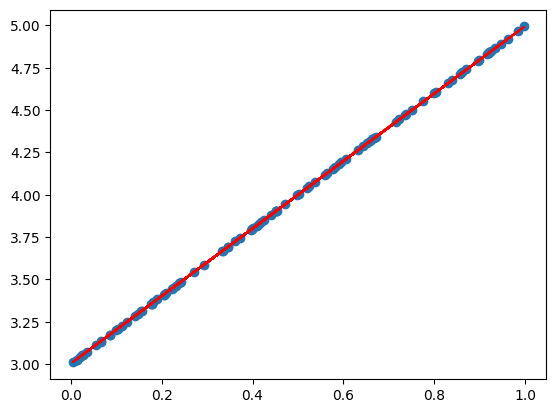

In [ ]:
x = np.random.random(100) #takes only one arg
y = 2 * x + 3 + np.random.uniform(0, 0.0001, 100)

# initialize w and b
w = np.random.rand()
b = np.random.rand()

#implement simple linear model
epochs = 1000
lr = 0.01
n = len(x)
for i in range(epochs):
  y_pred = (w * x) + b
  loss_mse = np.mean((y_pred - y) ** 2)

  #calculate gradients
  dw = (2/n) * np.sum((y_pred -y ) * x) # element wise multiplication
  db = (2/n) * np.sum(y_pred -y)

  #update params
  w -= lr * dw
  b -= lr * db
  if i % 100 == 0:
    # print(f"epoch {i}: Loss: {MSE: 0.4f}, w: {w : 0.4f}, b: {b: 0.4f}") ## WRong cuz of comma
    print(f"Epoch {i}: Loss = {loss_mse:0.4f}, w = {w:0.4f}, b = {b:0.4f}")
#plots
plt.scatter(x, y)
plt.plot(x, w*x+b, 'red')
plt.show()


## Using Pytorch

In [ ]:
import torch
import numpy

In [ ]:
torch.manual_seed(42)

x = torch.rand(100, 1)
y = 2 * x + 3 + torch.rand(100, 1)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

epoch = 1000
lr = 0.001

for i in range(epoch):
  #Compute a forward pass (predict output).
  y_pred = w * x + b

  #Compute a loss.
  loss_mse = torch.mean((y_pred - y) ** 2)

  #Call .backward() to compute gradients of loss w.r.t. parameters.
  loss_mse.backward()

  #Update the parameters (no grad tracking) o/w gets accumulated
  with torch.no_grad():
    w -= lr * w.grad
    b -+ lr * b.grad

  #Zero the gradients before the next iteration.If you don’t zero them out, PyTorch will accumulate gradients by default:
  w.grad.zero_() #_ inplace replacement
  b.grad.zero_()

  if i % 100 == 0:
          print(f"Epoch {i}: Loss = {loss_mse.item():.4f}, w = {w.item():.4f}, b = {b.item():.4f}")

print(f"\nFinal w = {w.item():.4f}, b = {b.item():.4f}")

Epoch 0: Loss = 17.6127, w = -0.6382, b = 0.7113
Epoch 100: Loss = 15.5407, w = -0.1834, b = 0.7113
Epoch 200: Loss = 13.7409, w = 0.2405, b = 0.7113
Epoch 300: Loss = 12.1775, w = 0.6356, b = 0.7113
Epoch 400: Loss = 10.8195, w = 1.0039, b = 0.7113
Epoch 500: Loss = 9.6399, w = 1.3471, b = 0.7113
Epoch 600: Loss = 8.6153, w = 1.6669, b = 0.7113
Epoch 700: Loss = 7.7253, w = 1.9651, b = 0.7113
Epoch 800: Loss = 6.9522, w = 2.2429, b = 0.7113
Epoch 900: Loss = 6.2806, w = 2.5019, b = 0.7113

Final w = 2.7409, b = 0.7113


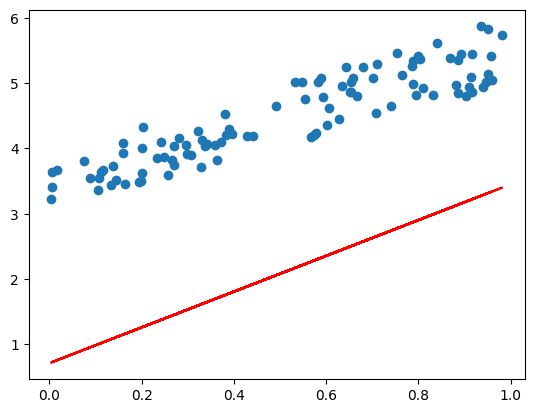

In [ ]:
plt.scatter(x, y)
plt.plot(x, (w*x+b).detach().numpy(), 'red') #w and b are PyTorch tensors with requires_grad=True. So, detach the tensor from the computation graph before converting to NumPy.
plt.show()

| Step                   | Action                                 | Equivalent in your manual version |
| ---------------------- | -------------------------------------- | --------------------------------- |
| `requires_grad=True`   | Tell PyTorch to track ops on tensors   | You computed dw, db manually      |
| `loss.backward()`      | Autograd computes all gradients        | Your derivative formulas          |
| `w.grad` / `b.grad`    | Contain computed gradients             | dw, db variables                  |
| `with torch.no_grad()` | Disable tracking while updating params | Manual update step                |
